In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math

In [0]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [0]:
df1 = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df2 = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [0]:
df1['Victory Status'] = df1['Victory Status'].replace(to_replace=2,value=0)

In [0]:
Y = df1['Victory Status'].copy()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Victory Status, dtype: int64

In [0]:
X = df1[['Number of soldiers','Number of tanks','Number of aircrafts']].copy()

In [0]:
X_test = df2[['Number of soldiers','Number of tanks','Number of aircrafts']].copy()

In [0]:
Y_test = df2['Id'].copy()

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.30)

In [0]:
X_train

array([[-0.78412493,  1.02183166, -0.55388587],
       [-1.0721174 , -1.48993331, -0.55388587],
       [ 0.65583738, -1.17596269,  1.70514701],
       [-0.11214252,  1.96374352, -0.55388587],
       [ 0.55983989,  0.39389041, -0.42100158],
       [ 1.23182231, -1.48993331, -0.55388587],
       [ 0.46384241, -1.48993331, -0.55388587],
       [-0.59212996,  1.33580228, -0.55388587],
       [-0.78412493,  0.39389041, -0.55388587],
       [ 1.13582482,  1.02183166,  1.43937843],
       [-0.20814001,  0.39389041,  0.37630414],
       [-1.8400973 ,  1.33580228,  0.37630414],
       [ 0.17584994,  1.02183166, -0.55388587],
       [ 0.27184743, -0.86199207, -0.55388587],
       [ 1.71180975,  1.6497729 , -0.28811729],
       [-0.68812745,  0.07991979, -0.55388587],
       [-0.97611991,  0.39389041, -0.28811729],
       [ 1.51981477,  1.02183166, -0.55388587],
       [-1.45610735, -0.86199207, -0.55388587],
       [ 0.75183487,  0.39389041, -0.55388587],
       [ 0.36784492,  0.39389041, -0.553

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [0]:
#def create_model(optimizer='adam'):
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(3,)),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1,activation='sigmoid')
])

#optimizer = SGD(lr=0.1)
model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])
  #return model
  
r = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
5/5 [==============================] - 0s 22ms/step - loss: 0.7230 - accuracy: 0.4610 - val_loss: 0.7120 - val_accuracy: 0.4848
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6805 - accuracy: 0.6429 - val_loss: 0.6962 - val_accuracy: 0.6667
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6560 - accuracy: 0.7208 - val_loss: 0.6871 - val_accuracy: 0.7121
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6385 - accuracy: 0.6818 - val_loss: 0.6800 - val_accuracy: 0.7273
Epoch 5/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6575 - accuracy: 0.7013 - val_loss: 0.6740 - val_accuracy: 0.7424
Epoch 6/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6379 - accuracy: 0.7078 - val_loss: 0.6697 - val_accuracy: 0.7424
Epoch 7/20
5/5 [==============================] - 0s 9ms/step - loss: 0.6247 - accuracy: 0.7338 - val_loss: 0.6667 - val_accuracy: 0.7424
Epoch 8/20
5/5 [=================

In [0]:
print("Train score:", model.evaluate(X_train, Y_train))

5/5 [==============================] - 0s 2ms/step - loss: 4.2522 - accuracy: 0.7208
Train score: [4.252191543579102, 0.7207792401313782]


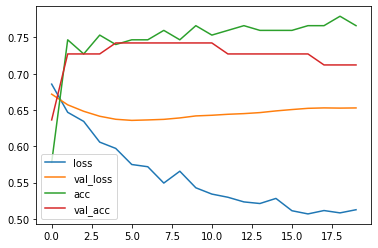

In [0]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
P = model.predict(X_test)

In [0]:
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [0]:
P = P.tolist()
Q = []
for i in P:
  Q.append(math.trunc(i))
#Q

In [0]:
id = df2['Id'].to_list()
#id

In [0]:
Y_pred = pd.DataFrame(list(zip(id, Q)), 
               columns =['Id', 'Category']) 
Y_pred

,Id,Category
0,1,1
1,7,1
2,8,1
3,9,1
4,11,1
...,...,...
81,293,1
82,296,1
83,301,1
84,303,1


In [0]:
Y_pred.set_index(['Id'], inplace=True)
Y_pred

,Category
Id,
1,1
7,1
8,1
9,1
11,1
...,...
293,1
296,1
301,1


In [0]:
Y_pred['Category'] = Y_pred['Category'].replace(to_replace=0,value=2)

In [0]:
Y_pred.to_csv('pred.csv')